In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
df = pd.read_csv("sentiment.csv")
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [25]:
df.info()
df['airline_sentiment'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  int64  
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

airline_sentiment
-1    9178
 0    3099
 1    2363
Name: count, dtype: int64

In [7]:
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT0001\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [9]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\d+', '', text)
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text


In [11]:
df['clean_text'] = df['text'].apply(clean_text)
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),said
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus youve added commercials experience tacky
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),didnt today must mean need take another trip
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),really big bad thing


In [23]:
df['airline_sentiment'] = df['airline_sentiment'].map({
    'positive': 1,
    'neutral': 0,
    'negative': -1
})



In [21]:
print(df.columns)


Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone', 'clean_text'],
      dtype='object')


In [27]:
X = df['clean_text']
y = df['airline_sentiment']


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [31]:
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2)
)


In [38]:
X_tfidf = tfidf.fit_transform(X)


In [40]:
from sklearn.model_selection import train_test_split



In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [44]:
from sklearn.linear_model import LogisticRegression


In [48]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [50]:
y_pred = model.predict(X_test)


In [52]:
print(type(model))


<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [54]:
y_pred

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7807377049180327


In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.80      0.94      0.87      1835
           0       0.64      0.49      0.56       620
           1       0.83      0.55      0.66       473

    accuracy                           0.78      2928
   macro avg       0.76      0.66      0.70      2928
weighted avg       0.77      0.78      0.77      2928



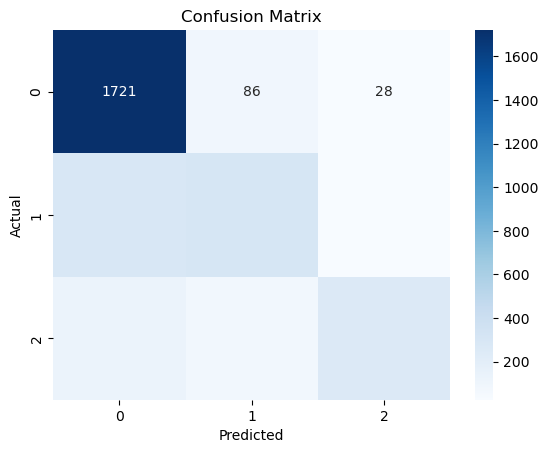

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [62]:
def predict_sentiment(text):
    # clean the text
    text = clean_text(text)
    
    # convert text to tf-idf
    vector = tfidf.transform([text])
    
    # predict
    prediction = model.predict(vector)[0]
    
    if prediction == 1:
        return "Positive 😊"
    elif prediction == 0:
        return "Neutral 😐"
    else:
        return "Negative 😠"


In [64]:
predict_sentiment("The flight was amazing and staff were very helpful")


'Positive 😊'

In [66]:
predict_sentiment("The airline experience was okay, nothing special")


'Negative 😠'

In [68]:
predict_sentiment("Worst flight ever, delayed for hours and rude staff")


'Negative 😠'

In [70]:
predict_sentiment("Worst flight ever, delayed for hours and rude staff")


'Negative 😠'

In [72]:
predict_sentiment("Worst flight ever, delayed for hours and rude staff")


'Negative 😠'

In [74]:
predict_sentiment("Worst flight ever, delayed for hours and rude staff")


'Negative 😠'

In [76]:
predict_sentiment("The flight was amazing and staff were very helpful")

'Positive 😊'

In [82]:
def predict_sentiment_with_prob(text):
    text = clean_text(text)
    vector = tfidf.transform([text])
    
    pred = model.predict(vector)[0]
    prob = model.predict_proba(vector)[0]
    
    sentiment_map = {
        1: "Positive 😊",
        0: "Neutral 😐",
        -1: "Negative 😠"
    }
    
    return sentiment_map[pred], prob



In [84]:
predict_sentiment_with_prob("The flight was delayed and staff was rude")


('Negative 😠', array([0.97821782, 0.01205152, 0.00973066]))

In [86]:
df['airline_sentiment'].value_counts(normalize=True)


airline_sentiment
-1    0.626913
 0    0.211680
 1    0.161407
Name: proportion, dtype: float64

In [88]:
model_balanced = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

model_balanced.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [90]:
y_pred_bal = model_balanced.predict(X_test)


In [92]:
y_pred_bal = model_balanced.predict(X_test)


In [94]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

print(classification_report(y_test, y_pred_nb))


              precision    recall  f1-score   support

          -1       0.73      0.98      0.84      1835
           0       0.69      0.28      0.40       620
           1       0.85      0.43      0.57       473

    accuracy                           0.74      2928
   macro avg       0.76      0.56      0.60      2928
weighted avg       0.74      0.74      0.70      2928



In [96]:
models = {
    "Logistic Regression": y_pred,
    "Balanced Logistic Regression": y_pred_bal,
    "Naive Bayes": y_pred_nb
}

for name, preds in models.items():
    print(name)
    print(classification_report(y_test, preds))


Logistic Regression
              precision    recall  f1-score   support

          -1       0.80      0.94      0.87      1835
           0       0.64      0.49      0.56       620
           1       0.83      0.55      0.66       473

    accuracy                           0.78      2928
   macro avg       0.76      0.66      0.70      2928
weighted avg       0.77      0.78      0.77      2928

Balanced Logistic Regression
              precision    recall  f1-score   support

          -1       0.89      0.79      0.84      1835
           0       0.52      0.71      0.60       620
           1       0.69      0.68      0.68       473

    accuracy                           0.75      2928
   macro avg       0.70      0.73      0.71      2928
weighted avg       0.78      0.75      0.76      2928

Naive Bayes
              precision    recall  f1-score   support

          -1       0.73      0.98      0.84      1835
           0       0.69      0.28      0.40       620
           1  

In [98]:
tfidf = TfidfVectorizer(
    max_features=8000,
    ngram_range=(1, 2),
    min_df=3
)


In [100]:
import pickle

# save model
with open("model.pkl", "wb") as f:
    pickle.dump(model_balanced, f)

# save tfidf
with open("tfidf.pkl", "wb") as f:
    pickle.dump(tfidf, f)


In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2)
)

X_tfidf = tfidf.fit_transform(X)   # 🔥 THIS LINE IS CRITICAL


In [104]:
from sklearn.linear_model import LogisticRegression

model_balanced = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

model_balanced.fit(X_tfidf, y)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [106]:
import pickle

pickle.dump(model_balanced, open("model.pkl", "wb"))
pickle.dump(tfidf, open("tfidf.pkl", "wb"))
